<a href="https://colab.research.google.com/github/KartohaWhy/my_colab/blob/main/Football_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загружаем датасет

In [ ]:
!kaggle datasets download -d ajaxianazarenka/premier-league

Dataset URL: https://www.kaggle.com/datasets/ajaxianazarenka/premier-league
License(s): MIT
  0% 0.00/346k [00:00<?, ?B/s]
100% 346k/346k [00:00<00:00, 62.2MB/s]


# Подготовка данных

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('matches.csv')
data.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


Смотрим все колонки, их описание можно найти на kaggle

In [ ]:
data.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

Удаляем те колонки, которые точно не подойдут для нашего обучения на данный момент(в дальнейшем при добавлении других данных некоторые из них можно будет использовать)

In [ ]:
data = data.drop(['Unnamed: 0','comp','referee'],axis=1)

In [ ]:
data = data.drop(['match report','attendance'],axis=1)

In [ ]:
data = data.drop(['notes','sh','sot','fk','pk','pkatt','dist'],axis=1)

In [ ]:
data.head()

,date,time,round,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,season,team
0,2020-09-21,20:15 (21:15),Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,0.6,65,Fernandinho,4-2-3-1,2024,Manchester City
1,2020-09-27,16:30 (17:30),Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,72,Fernandinho,4-2-3-1,2024,Manchester City
2,2020-10-03,17:30 (18:30),Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,2.4,49,Kevin De Bruyne,4-3-3,2024,Manchester City
3,2020-10-17,17:30 (18:30),Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,58,Raheem Sterling,3-1-4-2,2024,Manchester City
4,2020-10-24,12:30 (13:30),Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,69,Raheem Sterling,4-3-3,2024,Manchester City


In [ ]:
#data['time'].value_counts()

Меняем формат колонки time и разделяем ее на вечернее/дневное время. Колонку time затем удаляем

In [ ]:
data['time'] = data['time'].apply(lambda x: x.split(' ')[0])

In [ ]:
data['day_time'] = data['time'].apply(lambda x: 1 if int(x.split(':')[0]) < 17 else 0)

In [ ]:
data['evening_time'] = data['time'].apply(lambda x: 1 if int(x.split(':')[0]) >= 17 else 0)

In [ ]:
data = data.drop('time',axis=1)

In [ ]:
data.head()

,date,round,day,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,season,team,day_time,evening_time
0,2020-09-21,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,0.6,65,Fernandinho,4-2-3-1,2024,Manchester City,0,1
1,2020-09-27,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,2.9,72,Fernandinho,4-2-3-1,2024,Manchester City,1,0
2,2020-10-03,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,2.4,49,Kevin De Bruyne,4-3-3,2024,Manchester City,0,1
3,2020-10-17,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,0.9,58,Raheem Sterling,3-1-4-2,2024,Manchester City,0,1
4,2020-10-24,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,0.3,69,Raheem Sterling,4-3-3,2024,Manchester City,1,0


Точно также разделяем день недели на выходные/будни

In [ ]:
data['day_weekend'] = data['day'].apply(lambda x: 1 if x == 'Sat' or x =='Sun' else 0)

In [ ]:
data.drop('day',axis=1,inplace=True)

In [ ]:
data['season'].value_counts()

,count
season,
2024,1520
2023,988
2022,760
2021,760
2020,760


In [ ]:
data.drop('date',axis=1,inplace=True)

In [ ]:
#data['round'].value_counts()

In [ ]:
import seaborn as sns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   round         4788 non-null   object 
 1   venue         4788 non-null   object 
 2   result        4788 non-null   object 
 3   gf            4788 non-null   int64  
 4   ga            4788 non-null   int64  
 5   opponent      4788 non-null   object 
 6   xg            4788 non-null   float64
 7   xga           4788 non-null   float64
 8   poss          4788 non-null   int64  
 9   captain       4788 non-null   object 
 10  formation     4788 non-null   object 
 11  season        4788 non-null   int64  
 12  team          4788 non-null   object 
 13  day_time      4788 non-null   int64  
 14  evening_time  4788 non-null   int64  
 15  day_weekend   4788 non-null   int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 598.6+ KB


Смотрим на корреляцию числовых колонок между собой

<Axes: >

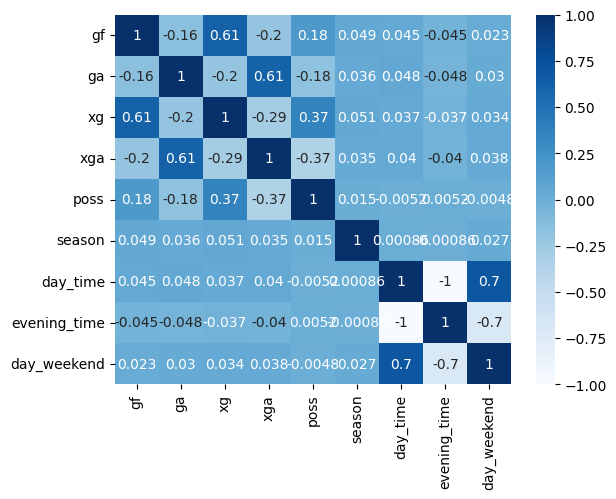

In [ ]:
cols = data.columns[data.dtypes != 'object']

corr = data[cols].corr()

sns.heatmap(corr,cmap='Blues',annot=True)

Смотрим на корреляцию нечисловых колонок

In [ ]:
!pip install association-metrics

  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3929 sha256=f86cc239c1222d7c8df26e704d149b965639fbc000fd5e19a3fe6da3bfd6ff90
  Stored in directory: /root/.cache/pip/wheels/01/47/5f/4360ef6988df6f1b0c1857cab43334269110160bd97b716936
Successfully built association-metrics


In [ ]:
import association_metrics as am

XC = data.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

cramersv = am.CramersV(XC)

cramersv.fit()

,round,venue,result,opponent,captain,formation,team
round,1.000000,0.018922,0.105317,0.016412,0.185379,0.096126,0.000000
venue,0.018922,1.000000,0.105056,0.000000,0.160026,0.063404,0.000000
result,0.105317,0.105056,1.000000,0.223719,0.304073,0.155526,0.230795
opponent,0.016412,0.000000,0.223719,1.000000,0.201199,0.090024,0.052576
captain,0.185379,0.160026,0.304073,0.201199,1.000000,0.404343,0.994330
formation,0.096126,0.063404,0.155526,0.090024,0.404343,1.000000,0.314709
team,0.000000,0.000000,0.230795,0.052576,0.994330,0.314709,1.000000


In [ ]:
data.head()

,round,venue,result,gf,ga,opponent,xg,xga,poss,captain,formation,season,team,day_time,evening_time,day_weekend
0,Matchweek 2,Away,W,3,1,Wolves,1.9,0.6,65,Fernandinho,4-2-3-1,2024,Manchester City,0,1,0
1,Matchweek 3,Home,L,2,5,Leicester City,0.9,2.9,72,Fernandinho,4-2-3-1,2024,Manchester City,1,0,1
2,Matchweek 4,Away,D,1,1,Leeds United,1.2,2.4,49,Kevin De Bruyne,4-3-3,2024,Manchester City,0,1,1
3,Matchweek 5,Home,W,1,0,Arsenal,1.3,0.9,58,Raheem Sterling,3-1-4-2,2024,Manchester City,0,1,1
4,Matchweek 6,Away,D,1,1,West Ham,1.0,0.3,69,Raheem Sterling,4-3-3,2024,Manchester City,1,0,1


Удаляем еще ненужные колонки. Колонка day_time не нужна, так как она не имеет смысла. Если evening_time = 0, то это день

In [ ]:
data.drop(['captain','day_time'],axis=1,inplace=True)

In [ ]:
data.head()

,round,venue,result,gf,ga,opponent,xg,xga,poss,formation,season,team,evening_time,day_weekend
0,Matchweek 2,Away,W,3,1,Wolves,1.9,0.6,65,4-2-3-1,2024,Manchester City,1,0
1,Matchweek 3,Home,L,2,5,Leicester City,0.9,2.9,72,4-2-3-1,2024,Manchester City,0,1
2,Matchweek 4,Away,D,1,1,Leeds United,1.2,2.4,49,4-3-3,2024,Manchester City,1,1
3,Matchweek 5,Home,W,1,0,Arsenal,1.3,0.9,58,3-1-4-2,2024,Manchester City,1,1
4,Matchweek 6,Away,D,1,1,West Ham,1.0,0.3,69,4-3-3,2024,Manchester City,0,1


In [ ]:
data['venue'].value_counts()

,count
venue,
Away,2394
Home,2394


Меняем место встречи в формат 1 0

In [ ]:
data['home_match'] = data['venue'].apply(lambda x: 1 if x=='Home' else 0)

In [ ]:
data.drop(['venue'],axis=1,inplace=True)

In [ ]:
#data = pd.get_dummies(data, columns=['result'], drop_first= True)

In [ ]:
#data.head()

,round,gf,ga,opponent,xg,xga,poss,formation,season,team,evening_time,day_weekend,home_match,result_L,result_W
0,Matchweek 2,3,1,Wolves,1.9,0.6,65,4-2-3-1,2024,Manchester City,1,0,0,False,True
1,Matchweek 3,2,5,Leicester City,0.9,2.9,72,4-2-3-1,2024,Manchester City,0,1,1,True,False
2,Matchweek 4,1,1,Leeds United,1.2,2.4,49,4-3-3,2024,Manchester City,1,1,0,False,False
3,Matchweek 5,1,0,Arsenal,1.3,0.9,58,3-1-4-2,2024,Manchester City,1,1,1,False,True
4,Matchweek 6,1,1,West Ham,1.0,0.3,69,4-3-3,2024,Manchester City,0,1,0,False,False


In [ ]:
#data['result_L'] = data['result_L'].apply(lambda x: 1 if x==True else 0)
#data['result_W'] = data['result_W'].apply(lambda x: 1 if x==True else 0)

In [ ]:
#data.drop('round',axis=1,inplace=True)

Еще раз смотрим на корреляцию с учетом новых колонок

<Axes: >

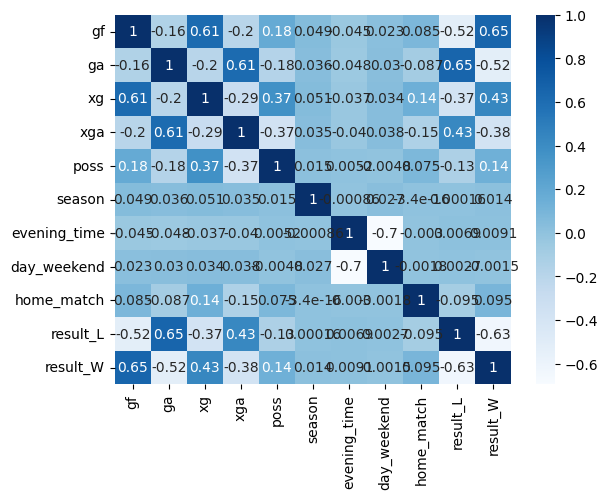

In [ ]:

cols = data.columns[data.dtypes != 'object']

corr = data[cols].corr()

sns.heatmap(corr,cmap='Blues',annot=True)

In [ ]:
data['poss'].value_counts()

,count
poss,
53,141
47,137
51,136
49,133
58,130
...,...
20,6
82,4
18,4


In [ ]:
data['home_match'].value_counts()

,count
home_match,
0,2394
1,2394


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   result        4788 non-null   object 
 1   gf            4788 non-null   int64  
 2   ga            4788 non-null   int64  
 3   opponent      4788 non-null   object 
 4   xg            4788 non-null   float64
 5   xga           4788 non-null   float64
 6   poss          4788 non-null   int64  
 7   formation     4788 non-null   object 
 8   season        4788 non-null   int64  
 9   team          4788 non-null   object 
 10  evening_time  4788 non-null   int64  
 11  day_weekend   4788 non-null   int64  
 12  home_match    4788 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 486.4+ KB


Так как матчи дублируются, то необходимо оставить либо только гостевые либо только домашние матчи

In [ ]:
df = data[data['home_match'] == 1]

In [ ]:
df.head()

,result,gf,ga,opponent,xg,xga,poss,formation,season,team,evening_time,day_weekend,home_match
1,L,2,5,Leicester City,0.9,2.9,72,4-2-3-1,2024,Manchester City,0,1,1
3,W,1,0,Arsenal,1.3,0.9,58,3-1-4-2,2024,Manchester City,1,1,1
6,D,1,1,Liverpool,1.4,1.2,54,4-2-3-1,2024,Manchester City,0,1,1
8,W,5,0,Burnley,1.7,0.5,68,4-2-3-1,2024,Manchester City,0,1,1
9,W,2,0,Fulham,2.9,0.3,69,4-2-3-1,2024,Manchester City,0,1,1


Превращаем целевой результат в очки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
mapping = {'W': 3, 'L': 0, 'D': 1}
df['result'] = df['result'].map(mapping)

<ipython-input-271-4bb5a4408306>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result'] = df['result'].map(mapping)


Колонка домашний матч теперь не нужна, там везде единицы

In [ ]:
df.drop('home_match',axis=1,inplace=True)

<ipython-input-272-e2af4f6eb093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('home_match',axis=1,inplace=True)


Удаляем количество забитых и пропущенных мячей, так как это напрямую показывает победителя

In [ ]:
df.drop(['gf','ga'],axis=1,inplace=True)

<ipython-input-274-bd1d0ceab02b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['gf','ga'],axis=1,inplace=True)


In [ ]:
df

,result,opponent,xg,xga,poss,formation,season,team,evening_time,day_weekend
1,0,Leicester City,0.9,2.9,72,4-2-3-1,2024,Manchester City,0,1
3,3,Arsenal,1.3,0.9,58,3-1-4-2,2024,Manchester City,1,1
6,1,Liverpool,1.4,1.2,54,4-2-3-1,2024,Manchester City,0,1
8,3,Burnley,1.7,0.5,68,4-2-3-1,2024,Manchester City,0,1
9,3,Fulham,2.9,0.3,69,4-2-3-1,2024,Manchester City,0,1
...,...,...,...,...,...,...,...,...,...,...
4779,0,Southampton,0.6,1.7,54,4-4-2,2020,Norwich City,1,0
4780,0,Everton,0.4,0.8,47,4-2-3-1,2020,Norwich City,1,0
4782,0,Brighton,0.6,1.0,58,4-2-3-1,2020,Norwich City,0,1
4784,0,West Ham,0.6,3.5,53,4-2-3-1,2020,Norwich City,0,1


In [ ]:
df.info

Снова смотрим на корреляцию числовых признаков, но целевая переменная теперь тоже числовая, поэтому можно увидеть влияние признаков на нее

<Axes: >

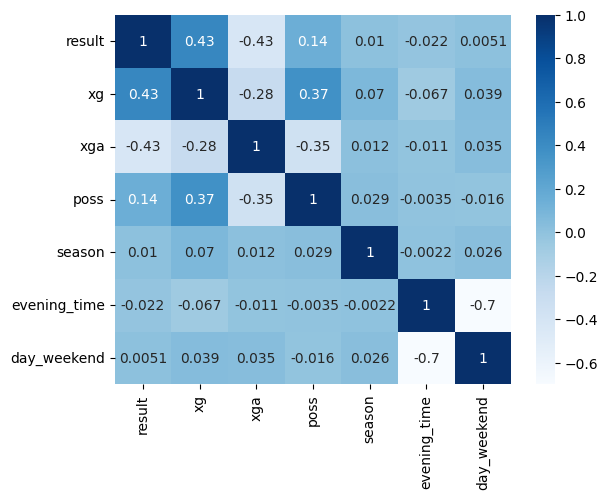

In [ ]:
cols = df.columns[df.dtypes != 'object']

corr = df[cols].corr()

sns.heatmap(corr,cmap='Blues',annot=True)

Сохраняем обработанную таблицу в файл

In [ ]:
df.to_csv('clean_matches_new.csv')

# Обучение

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('clean_matches_new.csv')

In [ ]:
df.head()

,Unnamed: 0,result,opponent,xg,xga,poss,formation,season,team,evening_time,day_weekend
0,1,0,Leicester City,0.9,2.9,72,4-2-3-1,2024,Manchester City,0,1
1,3,3,Arsenal,1.3,0.9,58,3-1-4-2,2024,Manchester City,1,1
2,6,1,Liverpool,1.4,1.2,54,4-2-3-1,2024,Manchester City,0,1
3,8,3,Burnley,1.7,0.5,68,4-2-3-1,2024,Manchester City,0,1
4,9,3,Fulham,2.9,0.3,69,4-2-3-1,2024,Manchester City,0,1


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
X = df.drop('result',axis=1)
y = df['result']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Пайплайны

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
!pip install category_encoders -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from category_encoders.target_encoder import TargetEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   result        2394 non-null   int64  
 1   opponent      2394 non-null   object 
 2   xg            2394 non-null   float64
 3   xga           2394 non-null   float64
 4   poss          2394 non-null   int64  
 5   formation     2394 non-null   object 
 6   season        2394 non-null   int64  
 7   team          2394 non-null   object 
 8   evening_time  2394 non-null   int64  
 9   day_weekend   2394 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 187.2+ KB


Тестируем пайплайны на четырех энкодерах, двух различных способах масштабирования и трех алгоритмах обучения

Сравниваем результаты и выбираем лучшие пайплайны

И затем оцениваем с помощью процента правильных предсказаний

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
cat_cols = X_train[['opponent','formation','season','team']]

In [ ]:
p1 = Pipeline([
    ('encoder',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',RandomForestClassifier(n_jobs=-1,random_state=42))
])

p2 = Pipeline([
    ('encoder',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier(n_jobs=-1,random_state=42))
])


p3 = Pipeline([
    ('encoder',OrdinalEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',RandomForestClassifier(n_jobs=-1,random_state=42))
])

p4 = Pipeline([
    ('encoder',OrdinalEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier(n_jobs=-1,random_state=42))
])

p5 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',RandomForestClassifier(n_jobs=-1,random_state=42))
])

p6 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier(n_jobs=-1,random_state=42))
])

p7 = Pipeline([
    ('encoder',TargetEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',RandomForestClassifier(n_jobs=-1,random_state=42))
])

p8 = Pipeline([
    ('encoder',TargetEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier(n_jobs=-1,random_state=42))
])

In [ ]:
for i,p in enumerate([p1,p2,p3,p4,p5,p6,p7,p8]):
    p.fit(X_train,y_train)
    pred = p.predict(X_test)
    print(i+1, accuracy_score(y_test,pred))

1 0.38731218697829717
2 0.38731218697829717
3 0.6928213689482471
4 0.6828046744574291
5 0.666110183639399
6 0.664440734557596
7 0.6894824707846411
8 0.6894824707846411


Лучший результат - номер 3

In [ ]:
p9 = Pipeline([
    ('encoder',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',LogisticRegression(multi_class='multinomial', solver='saga',random_state=42))
])

p10 = Pipeline([
    ('encoder',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(multi_class='multinomial', solver='saga',random_state=42))
])


p11 = Pipeline([
    ('encoder',OrdinalEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',LogisticRegression(multi_class='multinomial', solver='saga',random_state=42))
])

p12 = Pipeline([
    ('encoder',OrdinalEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(multi_class='multinomial', solver='saga',random_state=42))
])

p13 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',LogisticRegression(multi_class='multinomial', solver='saga',random_state=42))
])

p14 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(multi_class='multinomial', solver='saga',random_state=42))
])

p15 = Pipeline([
    ('encoder',TargetEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',LogisticRegression(multi_class='multinomial', solver='saga',random_state=42))
])

p16 = Pipeline([
    ('encoder',TargetEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(multi_class='multinomial', solver='saga',random_state=42))
])

In [ ]:
for i,p in enumerate([p9,p10,p11,p12,p13,p14,p15,p16]):
    p.fit(X_train,y_train)
    pred = p.predict(X_test)
    print(i+7, accuracy_score(y_test,pred))

7 0.6043405676126878
8 0.6026711185308848
9 0.5859766277128547
10 0.5993322203672788
11 0.5826377295492488


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


12 0.5809682804674458
13 0.6026711185308848
14 0.5976627712854758


Лучший результат - номер 7(9), но он значительно хуже третьего

In [ ]:
p17 = Pipeline([
    ('encoder',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',GradientBoostingClassifier(random_state=42))
])

p18 = Pipeline([
    ('encoder',LeaveOneOutEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',GradientBoostingClassifier(random_state=42))
])


p19 = Pipeline([
    ('encoder',OrdinalEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',GradientBoostingClassifier(random_state=42))
])

p20 = Pipeline([
    ('encoder',OrdinalEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',GradientBoostingClassifier(random_state=42))
])

p21 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',GradientBoostingClassifier(random_state=42))
])

p22 = Pipeline([
    ('encoder',OneHotEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',GradientBoostingClassifier(random_state=42))
])

p23 = Pipeline([
    ('encoder',TargetEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler()),
    ('model',GradientBoostingClassifier(random_state=42))
])

p24 = Pipeline([
    ('encoder',TargetEncoder(cols=cat_cols)),
    ('scaler',StandardScaler()),
    ('model',GradientBoostingClassifier(random_state=42))
])

In [ ]:
for i,p in enumerate([p17,p18,p19,p20,p21,p22,p23,p24]):
    p.fit(X_train,y_train)
    pred = p.predict(X_test)
    print(i+16, accuracy_score(y_test,pred))

16 0.22203672787979967
17 0.22203672787979967
18 0.6093489148580968
19 0.6093489148580968
20 0.5976627712854758
21 0.5976627712854758
22 0.6076794657762938
23 0.6076794657762938


Лучший результат - номера 18 и 19, они также значительно хуже третьего, но за счет правильного подбора гиперпараметров этот результат можно улучшить. С логистической регрессией это работает хуже

In [ ]:
p1.fit(X_train,y_train)

Pipeline(steps=[('encoder',
                 LeaveOneOutEncoder(cols=             opponent formation  season                      team
4589          Arsenal   4-2-3-1    2020  Brighton and Hove Albion
1570          Arsenal     5-3-2    2024                 Brentford
1880           Fulham     4-3-3    2023          Newcastle United
4550          Watford     4-3-3    2020            Crystal Palace
16     Crystal Palace     4-3-3    2024           Manchester City
...               ...       ...     ...                       ...
3277           Fulham   4-2-3-1    2021           Manchester City
2192          Everton     3-4-3    2023                   Chelsea
2261          Everton     3-4-3    2023           West Ham United
2589  Manchester City     3-5-2    2022                   Chelsea
1720           Wolves   3-4-1-2    2024          Sheffield United

[1795 rows x 4 columns])),
                ('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
pred_p3 = p3.predict(X_test)

accuracy = accuracy_score(y_test, pred_p3)
conf_matrix = confusion_matrix(y_test, pred_p3)
class_report = classification_report(y_test, pred_p3)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6928213689482471
Confusion Matrix:
 [[155  12  40]
 [ 35  51  47]
 [ 37  13 209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       207
           1       0.67      0.38      0.49       133
           3       0.71      0.81      0.75       259

    accuracy                           0.69       599
   macro avg       0.69      0.65      0.65       599
weighted avg       0.69      0.69      0.68       599



Загружаем оптуну для подбора гиперпараметров

In [ ]:
!pip install optuna -q

In [ ]:
my_pipeline = Pipeline([
    ('encoder',OrdinalEncoder(cols=cat_cols)),
    ('scaler',MinMaxScaler())
])

X_train_good = my_pipeline.fit_transform(X_train,y_train)
X_test_good = my_pipeline.transform(X_test)

Пишем функцию для подбора гиперпаметров и обучаем модель, гиперпараметры будут подбираться автоматически и с каждой попыткой становиться как можно лучше за счет того, что гиперпараметры будут подбираться близкими к лучшим из предыдущих попыток

In [ ]:
import optuna

def objective(trial):

    param = {
        'n_estimators':trial.suggest_int('n_estimators',1,1000),
        'max_features':trial.suggest_categorical('max_features',['sqrt','log2',None]),
        'max_depth':trial.suggest_int('max_depth',1,1000),
        'criterion':trial.suggest_categorical('criterion',['gini','entropy','log_loss']),
    }

    estimator = RandomForestClassifier(**param,verbose=False,n_jobs=-1,random_state=42)
    estimator.fit(X_train_good,y_train)
    pred = estimator.predict(X_test_good)

    return accuracy_score(y_test,pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=300)
print(study.best_trial)

[I 2024-09-15 18:33:26,281] A new study created in memory with name: no-name-bd935253-db93-46e9-a7a7-f526bcc10276
[I 2024-09-15 18:33:33,848] Trial 0 finished with value: 0.6928213689482471 and parameters: {'n_estimators': 863, 'max_features': None, 'max_depth': 565, 'criterion': 'gini'}. Best is trial 0 with value: 0.6928213689482471.
[I 2024-09-15 18:33:35,220] Trial 1 finished with value: 0.6844741235392321 and parameters: {'n_estimators': 234, 'max_features': 'sqrt', 'max_depth': 943, 'criterion': 'entropy'}. Best is trial 0 with value: 0.6928213689482471.
[I 2024-09-15 18:33:40,583] Trial 2 finished with value: 0.6811352253756261 and parameters: {'n_estimators': 691, 'max_features': 'sqrt', 'max_depth': 740, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.6928213689482471.
[I 2024-09-15 18:33:43,124] Trial 3 finished with value: 0.6928213689482471 and parameters: {'n_estimators': 318, 'max_features': None, 'max_depth': 527, 'criterion': 'entropy'}. Best is trial 0 with val

FrozenTrial(number=115, state=TrialState.COMPLETE, values=[0.6994991652754591], datetime_start=datetime.datetime(2024, 9, 15, 18, 41, 11, 49279), datetime_complete=datetime.datetime(2024, 9, 15, 18, 41, 15, 651997), params={'n_estimators': 582, 'max_features': None, 'max_depth': 458, 'criterion': 'gini'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=1, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', None)), 'max_depth': IntDistribution(high=1000, log=False, low=1, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy', 'log_loss'))}, trial_id=115, value=None)


In [ ]:
model_best_forest = RandomForestClassifier(n_estimators=582, max_features=None, max_depth=458,criterion='gini',random_state=42)
model_best_forest.fit(X_train_good,y_train)

pred_best_forest = model_best_forest.predict(X_test_good)

accuracy_score(y_test,pred_best_forest)

0.6994991652754591

Лучший результат стал выше, но менее, чем на один процент

Можно посмотреть на матрицу ошибок

In [ ]:
accuracy_forest = accuracy_score(y_test, pred_best_forest)
conf_matrix_forest = confusion_matrix(y_test, pred_best_forest)
class_report_forest = classification_report(y_test, pred_best_forest)

print("Accuracy:", accuracy_forest)
print("Confusion Matrix:\n", conf_matrix_forest)
print("Classification Report:\n", class_report_forest)

Accuracy: 0.6994991652754591
Confusion Matrix:
 [[154  22  31]
 [ 36  62  35]
 [ 31  25 203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       207
           1       0.57      0.47      0.51       133
           3       0.75      0.78      0.77       259

    accuracy                           0.70       599
   macro avg       0.67      0.66      0.67       599
weighted avg       0.69      0.70      0.69       599



Теперь делаем тоже самое с градиентным бустингом

In [ ]:
import optuna

def objective(trial):

    param = {
        'n_estimators':trial.suggest_int('n_estimators',50,1000),
        'loss':trial.suggest_categorical('loss',['log_loss']),
        'max_depth':trial.suggest_int('max_depth',1,1000),
        'criterion':trial.suggest_categorical('criterion',['friedman_mse', 'squared_error']),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,10),
        'min_samples_split':trial.suggest_int('min_samples_split',2,10),
    }

    estimator = GradientBoostingClassifier(**param,verbose=False,random_state=42)
    estimator.fit(X_train_good,y_train)
    pred = estimator.predict(X_test_good)

    return accuracy_score(y_test,pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=200)
print(study.best_trial)

[I 2024-09-15 18:58:47,595] A new study created in memory with name: no-name-3ea6e048-8035-48fd-80a9-bdb5cd0d9ead
[I 2024-09-15 18:58:59,542] Trial 0 finished with value: 0.666110183639399 and parameters: {'n_estimators': 116, 'loss': 'log_loss', 'max_depth': 302, 'criterion': 'friedman_mse', 'min_samples_leaf': 4, 'min_samples_split': 4}. Best is trial 0 with value: 0.666110183639399.
[I 2024-09-15 18:59:03,256] Trial 1 finished with value: 0.6861435726210351 and parameters: {'n_estimators': 97, 'loss': 'log_loss', 'max_depth': 504, 'criterion': 'squared_error', 'min_samples_leaf': 9, 'min_samples_split': 8}. Best is trial 1 with value: 0.6861435726210351.
[I 2024-09-15 18:59:18,075] Trial 2 finished with value: 0.664440734557596 and parameters: {'n_estimators': 607, 'loss': 'log_loss', 'max_depth': 385, 'criterion': 'squared_error', 'min_samples_leaf': 3, 'min_samples_split': 6}. Best is trial 1 with value: 0.6861435726210351.
[I 2024-09-15 18:59:32,112] Trial 3 finished with value: 

FrozenTrial(number=142, state=TrialState.COMPLETE, values=[0.7028380634390651], datetime_start=datetime.datetime(2024, 9, 15, 19, 39, 53, 656952), datetime_complete=datetime.datetime(2024, 9, 15, 19, 39, 58, 503441), params={'n_estimators': 100, 'loss': 'log_loss', 'max_depth': 859, 'criterion': 'squared_error', 'min_samples_leaf': 10, 'min_samples_split': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=50, step=1), 'loss': CategoricalDistribution(choices=('log_loss',)), 'max_depth': IntDistribution(high=1000, log=False, low=1, step=1), 'criterion': CategoricalDistribution(choices=('friedman_mse', 'squared_error')), 'min_samples_leaf': IntDistribution(high=10, log=False, low=1, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=142, value=None)


Результат поднялся на 10%, что очень хорошо. И он стал выше, чем результат случайного леса

Проверим еще некоторые гиперпараметры

In [ ]:
import optuna

def objective(trial):

    param = {
        'n_estimators':trial.suggest_int('n_estimators',50,1000),
        'max_depth':trial.suggest_int('max_depth',1,1000),
        'criterion':trial.suggest_categorical('criterion',['friedman_mse', 'squared_error']),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf',10,50),
    }

    estimator = GradientBoostingClassifier(**param,verbose=False,random_state=42)
    estimator.fit(X_train_good,y_train)
    pred = estimator.predict(X_test_good)

    return accuracy_score(y_test,pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=30)
print(study.best_trial)

[I 2024-09-15 20:10:07,496] A new study created in memory with name: no-name-65de5448-66b6-4724-a436-fa554179ed2c
[I 2024-09-15 20:10:36,502] Trial 0 finished with value: 0.664440734557596 and parameters: {'n_estimators': 943, 'max_depth': 572, 'criterion': 'squared_error', 'min_samples_leaf': 31}. Best is trial 0 with value: 0.664440734557596.
[I 2024-09-15 20:10:43,726] Trial 1 finished with value: 0.657762938230384 and parameters: {'n_estimators': 280, 'max_depth': 963, 'criterion': 'squared_error', 'min_samples_leaf': 34}. Best is trial 0 with value: 0.664440734557596.
[I 2024-09-15 20:10:54,366] Trial 2 finished with value: 0.672787979966611 and parameters: {'n_estimators': 457, 'max_depth': 236, 'criterion': 'squared_error', 'min_samples_leaf': 35}. Best is trial 2 with value: 0.672787979966611.
[I 2024-09-15 20:11:04,979] Trial 3 finished with value: 0.669449081803005 and parameters: {'n_estimators': 376, 'max_depth': 315, 'criterion': 'squared_error', 'min_samples_leaf': 23}. B

FrozenTrial(number=23, state=TrialState.COMPLETE, values=[0.6811352253756261], datetime_start=datetime.datetime(2024, 9, 15, 20, 17, 33, 723859), datetime_complete=datetime.datetime(2024, 9, 15, 20, 17, 56, 474488), params={'n_estimators': 712, 'max_depth': 461, 'criterion': 'squared_error', 'min_samples_leaf': 15}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=50, step=1), 'max_depth': IntDistribution(high=1000, log=False, low=1, step=1), 'criterion': CategoricalDistribution(choices=('friedman_mse', 'squared_error')), 'min_samples_leaf': IntDistribution(high=50, log=False, low=10, step=1)}, trial_id=23, value=None)


Результат выше не стал

In [ ]:
model_best_gradient = GradientBoostingClassifier(n_estimators=100, loss='log_loss', max_depth=859,criterion='squared_error',min_samples_leaf=10, random_state=42)
model_best_gradient.fit(X_train_good,y_train)

pred_best_gradient = model_best_gradient.predict(X_test_good)

accuracy_score(y_test,pred_best_gradient)

0.7028380634390651

70% правильных предсказаний - лучший результат, его и оставим

In [ ]:
accuracy_gradient = accuracy_score(y_test, pred_best_gradient)
conf_matrix_gradient = confusion_matrix(y_test, pred_best_gradient)
class_report_gradient = classification_report(y_test, pred_best_gradient)

print("Accuracy:", accuracy_gradient)
print("Confusion Matrix:\n", conf_matrix_gradient)
print("Classification Report:\n", class_report_gradient)

Accuracy: 0.7028380634390651
Confusion Matrix:
 [[153  21  33]
 [ 32  65  36]
 [ 32  24 203]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       207
           1       0.59      0.49      0.53       133
           3       0.75      0.78      0.76       259

    accuracy                           0.70       599
   macro avg       0.68      0.67      0.67       599
weighted avg       0.70      0.70      0.70       599



# Предсказание

Теперь мы можем предсказывать новые матчи

In [ ]:
df['team'].unique()

array(['Manchester City', 'Manchester United', 'Liverpool', 'Chelsea',
       'Leicester City', 'West Ham United', 'Tottenham Hotspur',
       'Arsenal', 'Leeds United', 'Everton', 'Aston Villa',
       'Newcastle United', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Southampton', 'Brighton and Hove Albion', 'Burnley', 'Fulham',
       'West Bromwich Albion', 'Sheffield United', 'Bournemouth',
       'Brentford', 'Nottingham Forest', 'Luton Town', 'Watford',
       'Norwich City'], dtype=object)

In [ ]:
df.head()

,result,opponent,xg,xga,poss,formation,season,team,evening_time,day_weekend
1,0,Leicester City,0.9,2.9,72,4-2-3-1,2024,Manchester City,0,1
3,3,Arsenal,1.3,0.9,58,3-1-4-2,2024,Manchester City,1,1
6,1,Liverpool,1.4,1.2,54,4-2-3-1,2024,Manchester City,0,1
8,3,Burnley,1.7,0.5,68,4-2-3-1,2024,Manchester City,0,1
9,3,Fulham,2.9,0.3,69,4-2-3-1,2024,Manchester City,0,1


In [ ]:
df.columns

Index(['result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'formation',
       'season', 'team', 'evening_time', 'day_weekend', 'home_match'],
      dtype='object')

Создаем переменные с результатами команд за последний сезон

In [ ]:
manchester_city = df[(df['team'] == 'Manchester City') & (df['season'] == 2024)]
manchester_united = df[(df['team'] == 'Manchester United') & (df['season'] == 2024)]
liverpool = df[(df['team'] == 'Liverpool') & (df['season'] == 2024)]
chelsea = df[(df['team'] == 'Chelsea') & (df['season'] == 2024)]
leicester_city = df[(df['team'] == 'Leicester City') & (df['season'] == 2024)]
west_ham_united = df[(df['team'] == 'West Ham United') & (df['season'] == 2024)]
tottenham_hotspur = df[(df['team'] == 'Tottenham Hotspur') & (df['season'] == 2024)]
arsenal = df[(df['team'] == 'Arsenal') & (df['season'] == 2024)]
leeds_united = df[(df['team'] == 'Leeds United') & (df['season'] == 2024)]
everton = df[(df['team'] == 'Everton') & (df['season'] == 2024)]
aston_villa = df[(df['team'] == 'Aston Villa') & (df['season'] == 2024)]
newcastle_united = df[(df['team'] == 'Newcastle United') & (df['season'] == 2024)]
wolverhampton_wanderers = df[(df['team'] == 'Wolverhampton Wanderers') & (df['season'] == 2024)]
crystal_palace = df[(df['team'] == 'Crystal Palace') & (df['season'] == 2024)]
southampton = df[(df['team'] == 'Southampton') & (df['season'] == 2024)]
brighton_and_hove_albion = df[(df['team'] == 'Brighton and Hove Albion') & (df['season'] == 2024)]
burnley = df[(df['team'] == 'Burnley') & (df['season'] == 2024)]
fulham = df[(df['team'] == 'Fulham') & (df['season'] == 2024)]
west_bromwich_albion = df[(df['team'] == 'West Bromwich Albion') & (df['season'] == 2024)]
sheffield_united = df[(df['team'] == 'Sheffield United') & (df['season'] == 2024)]
bournemouth = df[(df['team'] == 'Bournemouth') & (df['season'] == 2024)]
brentford = df[(df['team'] == 'Brentford') & (df['season'] == 2024)]
nottingham_forest = df[(df['team'] == 'Nottingham Forest') & (df['season'] == 2024)]
luton_town = df[(df['team'] == 'Luton Town') & (df['season'] == 2024)]
watford = df[(df['team'] == 'Watford') & (df['season'] == 2024)]
norwich_city = df[(df['team'] == 'Norwich City') & (df['season'] == 2024)]




In [ ]:
#df[(df['team'] == 'Aston Villa') & (df['season'] == 2024)]

Заполняем xg, xga и poss средними значениями за сезон

In [ ]:
mean_xg = wolverhampton_wanderers['xg'].mean()
mean_xga = newcastle_united['xga'].mean()
mean_possession = wolverhampton_wanderers['poss'].mean()

Теперь у нас есть данные для всех колонок и можно предсказывать результат

In [ ]:
new_match_data = {
    'opponent': 'Newcastle United',
    'xg': mean_xg,  # Среднее ожидаемое количество голов
    'xga': mean_xga, # Среднее ожидаемое количество пропущенных голов
    'poss': mean_possession,     # Среднее владение мячом
    'formation': '4-4-1-1',  # Схема
    'season': 2024,
    'team': 'Wolverhampton Wanderers',
    'evening_time': 1,
    'day_weekend': 1,
}

new_match_df = pd.DataFrame([new_match_data])
new_match_encoded = my_pipeline.named_steps['encoder'].transform(new_match_df)
new_match_scaled = my_pipeline.named_steps['scaler'].transform(new_match_encoded)
predicted_result = model_best_gradient.predict(new_match_scaled)
predicted_probabilities = model_best_gradient.predict_proba(new_match_scaled)
print("Предсказанный результат матча:", predicted_result[0])
print("Вероятности для каждого результата (победа, ничья, поражение):", predicted_probabilities)

Предсказанный результат матча: 3
Вероятности для каждого результата (победа, ничья, поражение): [[0.41690712 0.02508325 0.55800963]]
